# Daily statistics from six-hourly SEAS5 data

In [1]:
from earthkit.transforms import aggregate as ekt
from earthkit import data as ekd

from earthkit.data.testing import earthkit_remote_test_data_file
ekd.settings.set("cache-policy", "user")

import matplotlib.pyplot as plt

/tmp/ipykernel_4239/1981593677.py:1: FutureWarning: The 'earthkit.transforms.aggregate' module is deprecated and will be removed in version 2.X of earthkit.transforms. Please import the from earthkit.transforms, e.g.: from earthkit.transforms import spatial
  from earthkit.transforms import aggregate as ekt


## Load some test data

All `earthkit-transforms` methods can be called with `earthkit-data` objects (Readers and Wrappers) or with the 
pre-loaded `xarray`.

In this example we will use three initialisation of the SEAS5 2m temperature data on a 1.x1. spatial grid. The temporal resolution is 6 hourly, and we have the forecasts for January, February and March 2015.

First we download (if not already cached) and lazily load the SEAS5 data (please see tutorials in `earthkit-data` for more details in cache management).

We convert the data to an `xarray.Dataset` object with some additional options better suited for the data we're handling.

In [2]:
# Get some demonstration ERA5 data, this could be any url or path to an ERA5 grib or netCDF file.
remote_seas5_file = earthkit_remote_test_data_file("test-data", "seas5_2m_temperature_201501-201503_europe_1deg.grib")
seas5_data = ekd.from_source("url", remote_seas5_file)
seas5_xr = seas5_data.to_xarray(time_dim_mode="forecast", add_valid_time_coord=True).rename({"2t": "t2m"})
seas5_xr

seas5_2m_temperature_201501-201503_europe_1deg.grib:   0%|          | 0.00/47.2M [00:00<?, ?B/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:   2%|▏         | 1.00M/47.2M [00:01<01:01, 786kB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:   4%|▍         | 2.00M/47.2M [00:01<00:42, 1.12MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:   6%|▋         | 3.00M/47.2M [00:02<00:30, 1.53MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:   8%|▊         | 4.00M/47.2M [00:02<00:24, 1.84MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  11%|█         | 5.00M/47.2M [00:03<00:20, 2.14MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  13%|█▎        | 6.00M/47.2M [00:03<00:16, 2.64MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  15%|█▍        | 7.00M/47.2M [00:03<00:13, 3.09MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  17%|█▋        | 8.00M/47.2M [00:03<00:12, 3.34MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  19%|█▉        | 9.00M/47.2M [00:03<00:09, 4.08MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  21%|██        | 10.0M/47.2M [00:04<00:09, 4.07MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  23%|██▎       | 11.0M/47.2M [00:04<00:07, 4.78MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  25%|██▌       | 12.0M/47.2M [00:04<00:06, 5.44MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  28%|██▊       | 13.0M/47.2M [00:04<00:05, 6.01MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  30%|██▉       | 14.0M/47.2M [00:04<00:05, 6.50MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  32%|███▏      | 15.0M/47.2M [00:04<00:04, 6.90MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  34%|███▍      | 16.0M/47.2M [00:04<00:04, 7.20MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  36%|███▌      | 17.0M/47.2M [00:05<00:04, 7.43MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  38%|███▊      | 18.0M/47.2M [00:05<00:04, 7.60MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  40%|████      | 19.0M/47.2M [00:05<00:03, 7.80MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  42%|████▏     | 20.0M/47.2M [00:05<00:03, 7.97MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  45%|████▍     | 21.0M/47.2M [00:05<00:03, 7.99MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  49%|████▊     | 23.0M/47.2M [00:05<00:02, 10.3MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  51%|█████     | 24.0M/47.2M [00:05<00:02, 9.71MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  55%|█████▌    | 26.0M/47.2M [00:06<00:01, 11.6MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  59%|█████▉    | 28.0M/47.2M [00:06<00:01, 12.7MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  64%|██████▎   | 30.0M/47.2M [00:06<00:01, 13.6MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  68%|██████▊   | 32.0M/47.2M [00:06<00:01, 11.3MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  72%|███████▏  | 34.0M/47.2M [00:06<00:01, 12.4MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  76%|███████▋  | 36.0M/47.2M [00:06<00:00, 13.3MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  81%|████████  | 38.0M/47.2M [00:06<00:00, 14.0MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  85%|████████▍ | 40.0M/47.2M [00:07<00:00, 14.6MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  89%|████████▉ | 42.0M/47.2M [00:07<00:00, 15.0MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  93%|█████████▎| 44.0M/47.2M [00:07<00:00, 15.3MB/s]

seas5_2m_temperature_201501-201503_europe_1deg.grib:  97%|█████████▋| 46.0M/47.2M [00:07<00:00, 15.5MB/s]

<xarray.Dataset> Size: 182MB
Dimensions:                  (number: 25, forecast_reference_time: 3,
                              step: 239, latitude: 31, longitude: 41)
Coordinates:
  * number                   (number) int64 200B 0 1 2 3 4 5 ... 20 21 22 23 24
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 24B 201...
  * step                     (step) timedelta64[ns] 2kB 0 days 06:00:00 ... 5...
    valid_time               (forecast_reference_time, step) datetime64[ns] 6kB ...
  * latitude                 (latitude) float64 248B 70.0 69.0 ... 41.0 40.0
  * longitude                (longitude) float64 328B -10.0 -9.0 ... 29.0 30.0
Data variables:
    t2m                      (number, forecast_reference_time, step, latitude, longitude) float64 182MB ...
Attributes: (12/14)
    param:        2t
    paramId:      167
    class:        c3
    stream:       mmsf
    levtype:      sfc
    type:         fc
    ...           ...
    time:         0
    origin:       ecmf
    domain:       g
    method:       1
    Conventions:  CF-1.8
    institution:  ECMWF

## Calculate the daily median of the Seasonal Forecast data

In this first example we will handle the forecast initialisations independently, i.e. return the daily median of the 3 different forecasts. To do this we must specify that the time-dimension we wish to calculate the aggregation over is the "step" dimension.

In [3]:
seas_daily_median_by_step = ekt.temporal.daily_median(
    seas5_xr, time_dim="step"
)
seas_daily_median_by_step.coords["valid_time"] = (
    seas_daily_median_by_step["forecast_reference_time"] + seas_daily_median_by_step["step"]
)
seas_daily_median_by_step

<xarray.Dataset> Size: 46MB
Dimensions:                  (step: 60, number: 25, forecast_reference_time: 3,
                              latitude: 31, longitude: 41)
Coordinates:
  * number                   (number) int64 200B 0 1 2 3 4 5 ... 20 21 22 23 24
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 24B 201...
  * latitude                 (latitude) float64 248B 70.0 69.0 ... 41.0 40.0
  * longitude                (longitude) float64 328B -10.0 -9.0 ... 29.0 30.0
  * step                     (step) timedelta64[ns] 480B 0 days 06:00:00 ... ...
    valid_time               (forecast_reference_time, step) datetime64[ns] 1kB ...
Data variables:
    t2m                      (step, number, forecast_reference_time, latitude, longitude) float64 46MB ...
Attributes: (12/14)
    param:        2t
    paramId:      167
    class:        c3
    stream:       mmsf
    levtype:      sfc
    type:         fc
    ...           ...
    time:         0
    origin:       ecmf
    domain:       g
    method:       1
    Conventions:  CF-1.8
    institution:  ECMWF

In [4]:
seas5_daily_median_by_vt = ekt.temporal.daily_median(seas5_xr, time_dim="valid_time")
seas5_daily_median_by_vt

<xarray.Dataset> Size: 30MB
Dimensions:    (date: 119, number: 25, latitude: 31, longitude: 41)
Coordinates:
  * number     (number) int64 200B 0 1 2 3 4 5 6 7 8 ... 17 18 19 20 21 22 23 24
  * latitude   (latitude) float64 248B 70.0 69.0 68.0 67.0 ... 42.0 41.0 40.0
  * longitude  (longitude) float64 328B -10.0 -9.0 -8.0 -7.0 ... 28.0 29.0 30.0
  * date       (date) datetime64[ns] 952B 2015-01-01 2015-01-02 ... 2015-04-29
Data variables:
    t2m        (date, number, latitude, longitude) float64 30MB 269.2 ... 282.2
Attributes: (12/14)
    param:        2t
    paramId:      167
    class:        c3
    stream:       mmsf
    levtype:      sfc
    type:         fc
    ...           ...
    time:         0
    origin:       ecmf
    domain:       g
    method:       1
    Conventions:  CF-1.8
    institution:  ECMWF

## Plot a random point location to see the different aggregation methods

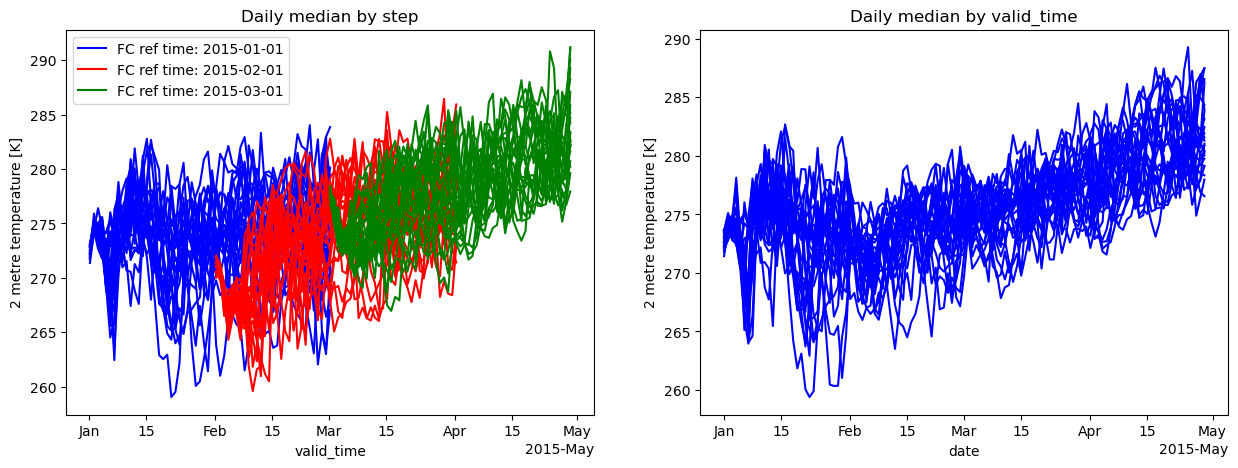

In [5]:
isel_kwargs = {"latitude":20, "longitude":20}

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15,5))

forecast_colours = ["blue", "red", "green"]

# era5_data.to_xarray().t2m.isel(**isel_kwargs).plot(label='Raw data', ax=ax)
f_kwargs = {"label": "Daily median over step"}

for itime in range(3):
    for number in range(25):
        t_data = seas_daily_median_by_step.t2m.isel(**isel_kwargs, number=number, forecast_reference_time=itime)
        if number == 0:
            extra_kwargs = {"label": f"FC ref time: {str(t_data.forecast_reference_time.values)[:10]}"}
        else:
            extra_kwargs = {}
        t_data.plot(
            x = "valid_time",
            ax=axes[0], color=forecast_colours[itime], **extra_kwargs
        )
axes[0].legend(loc=2)
axes[0].set_title("Daily median by step")

for number in range(25):
    t_data = seas5_daily_median_by_vt.t2m.isel(**isel_kwargs, number=number)
    extra_kwargs = {}
    t_data.plot(
        x = "date",
        ax=axes[1], color=forecast_colours[0], **extra_kwargs
        )

axes[1].set_title("Daily median by valid_time")

plt.show()